In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys 
import os

# TODO: make more pythonic
# this line walks up file directory so rule-vetting is cwd
# Currently this breaks if chunk is run multiple times
os.chdir(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))))
print(os.getcwd())

import rulevetting.api.viz as viz
from rulevetting.projects.csi_pecarn.dataset import Dataset

/accounts/grad/wtorous/rule-vetting


In [3]:
eda_df = Dataset().get_data()

kwargs {'clean_data': {'use_kappa': False, 'use_robust_av': True}, 'preprocess_data': {'frac_missing_allowed': 0.05}, 'extract_features': {'drop_negative_columns': False}}


In [4]:
outcome_def = 'csi_injury'

In [5]:
print(eda_df.shape)

(2901, 170)


In [6]:
# get list of columns with only two recorded outcomes
binary_columns = eda_df.columns[eda_df.nunique()==2]
binary_eda_data = eda_df.loc[:,binary_columns].copy() 

cont_columns = eda_df.columns[eda_df.nunique()!=2]
cont_eda_data = eda_df.loc[:,cont_columns].copy()
cont_eda_data.loc[:,outcome_def] = eda_df.loc[:,outcome_def].copy() #add binary outcome indicator back in

In [7]:
# outcome indicator is double counted
print(eda_df.shape)
print(binary_eda_data.shape)
print(cont_eda_data.shape)

(2901, 170)
(2901, 159)
(2901, 12)


# Summary EDA

In [8]:
eda_df.describe()

,AgeInYears,AlteredMentalStatus2,ArrivalTimeND,Assault,AxialLoadAnyDoc,BodyAsAWhole0,BodyAsAWhole2,BodyAsAWhole5,BodyAsAWhole6,CSpinePrecautionsCC,...,PtCompPain_binary,PtCompPainNeckMove_binary,PtExtremityWeakness_binary,PtParesthesias_binary,PtSensoryLoss_binary,PtTender_binary,ReceivedInTransfer_binary,Respiratory_binary,clotheslining_binary,helmet_binary
count,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,...,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000
mean,10.083261,0.247846,0.022061,0.032058,0.250259,0.003102,0.000345,0.000345,0.021717,0.583937,...,0.653568,0.048604,0.052051,0.058945,0.049983,0.397104,0.225095,0.158221,0.009997,0.079283
std,4.673592,0.431836,0.146908,0.176184,0.433237,0.055622,0.018566,0.018566,0.145782,0.492989,...,0.475915,0.215076,0.222168,0.235563,0.217947,0.489382,0.417717,0.365011,0.099499,0.270227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
binary_corrs = binary_eda_data.corr(method='spearman')
cont_corrs = cont_eda_data.corr(method='spearman')

print(cont_corrs)

                   AgeInYears  EMSEstimateTime  FallDownStairs  \
AgeInYears           1.000000         0.015721       -0.121439   
EMSEstimateTime      0.015721         1.000000       -0.013225   
FallDownStairs      -0.121439        -0.013225        1.000000   
FallFromElevation   -0.219458        -0.031644       -0.069529   
GCSEye               0.073910         0.088891        0.009292   
LocEvalPhysician    -0.016205        -0.053313       -0.024877   
MVCSpeed            -0.041294         0.015280       -0.065028   
MotorGCS             0.076008         0.083542        0.001544   
OMTSpeed             0.060962        -0.040296       -0.018803   
TotalGCSManual       0.057073         0.075333        0.000969   
VerbalGCS            0.063394         0.079571        0.013375   
csi_injury           0.045136        -0.058504       -0.039739   

                   FallFromElevation    GCSEye  LocEvalPhysician  MVCSpeed  \
AgeInYears                 -0.219458  0.073910         -0.01620

/accounts/grad/wtorous/.local/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


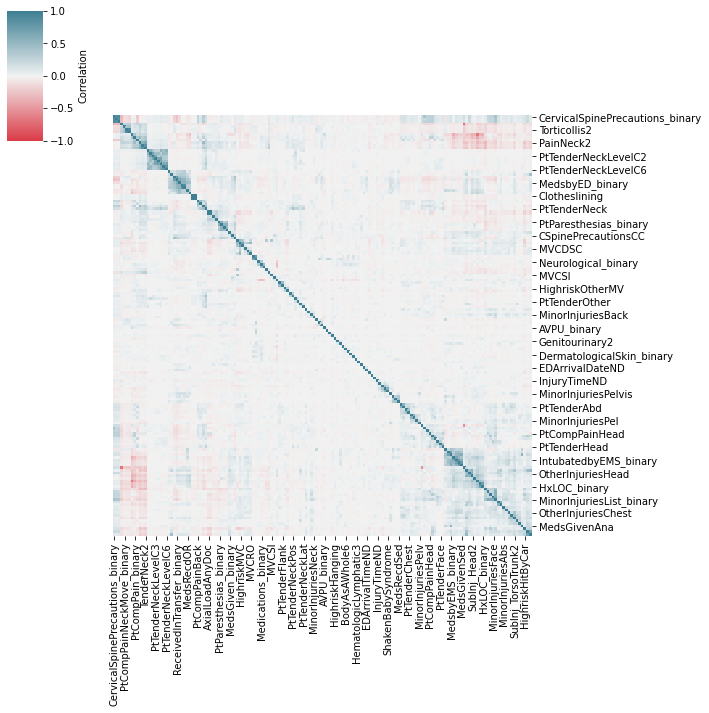

In [10]:
binary_corrmap = sns.clustermap(binary_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
binary_corrmap.ax_row_dendrogram.set_visible(False)
binary_corrmap.ax_col_dendrogram.set_visible(False)

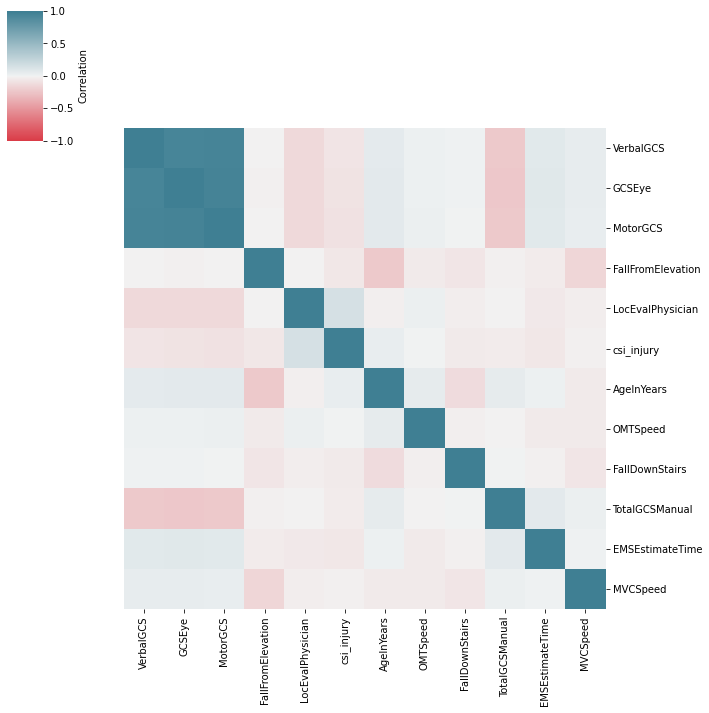

In [11]:
cont_corrmap = sns.clustermap(cont_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
cont_corrmap.ax_row_dendrogram.set_visible(False)
cont_corrmap.ax_col_dendrogram.set_visible(False)

In [12]:
print(binary_corrs)

                           AlteredMentalStatus2  ArrivalTimeND   Assault  \
AlteredMentalStatus2                   1.000000       0.006185  0.013372   
ArrivalTimeND                          0.006185       1.000000 -0.000689   
Assault                                0.013372      -0.000689  1.000000   
AxialLoadAnyDoc                       -0.049647       0.005328 -0.032861   
BodyAsAWhole0                         -0.032023      -0.008379 -0.010152   
...                                         ...            ...       ...   
PtTender_binary                       -0.243966       0.017196  0.024273   
ReceivedInTransfer_binary              0.126467       0.014576 -0.023117   
Respiratory_binary                    -0.027917      -0.032964 -0.014556   
clotheslining_binary                  -0.041632      -0.015093  0.060395   
helmet_binary                         -0.047293      -0.009330 -0.053404   

                           AxialLoadAnyDoc  BodyAsAWhole0  BodyAsAWhole2  \
AlteredMent

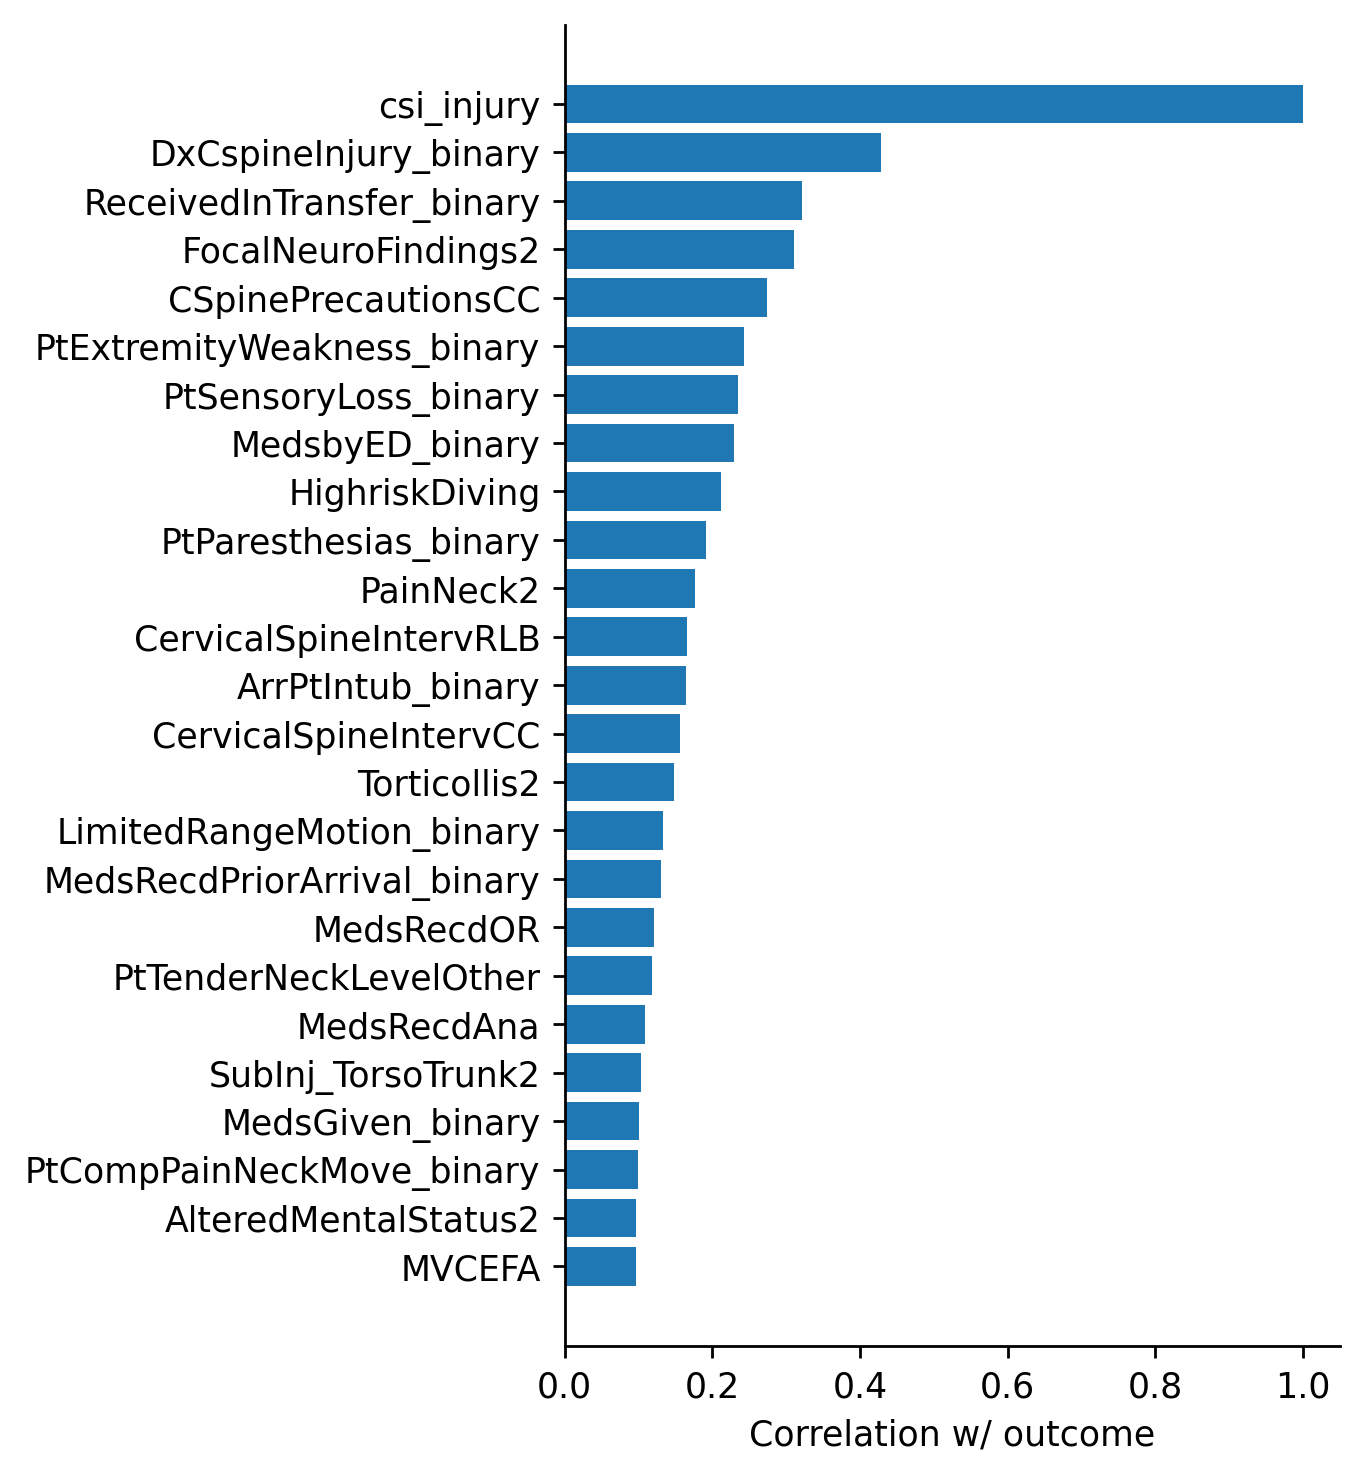

In [13]:
plt.figure(dpi=250, figsize=(4, 7))
vals = binary_corrs[outcome_def]
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[-25:], vals[args][-25:])
plt.xlabel('Correlation w/ outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

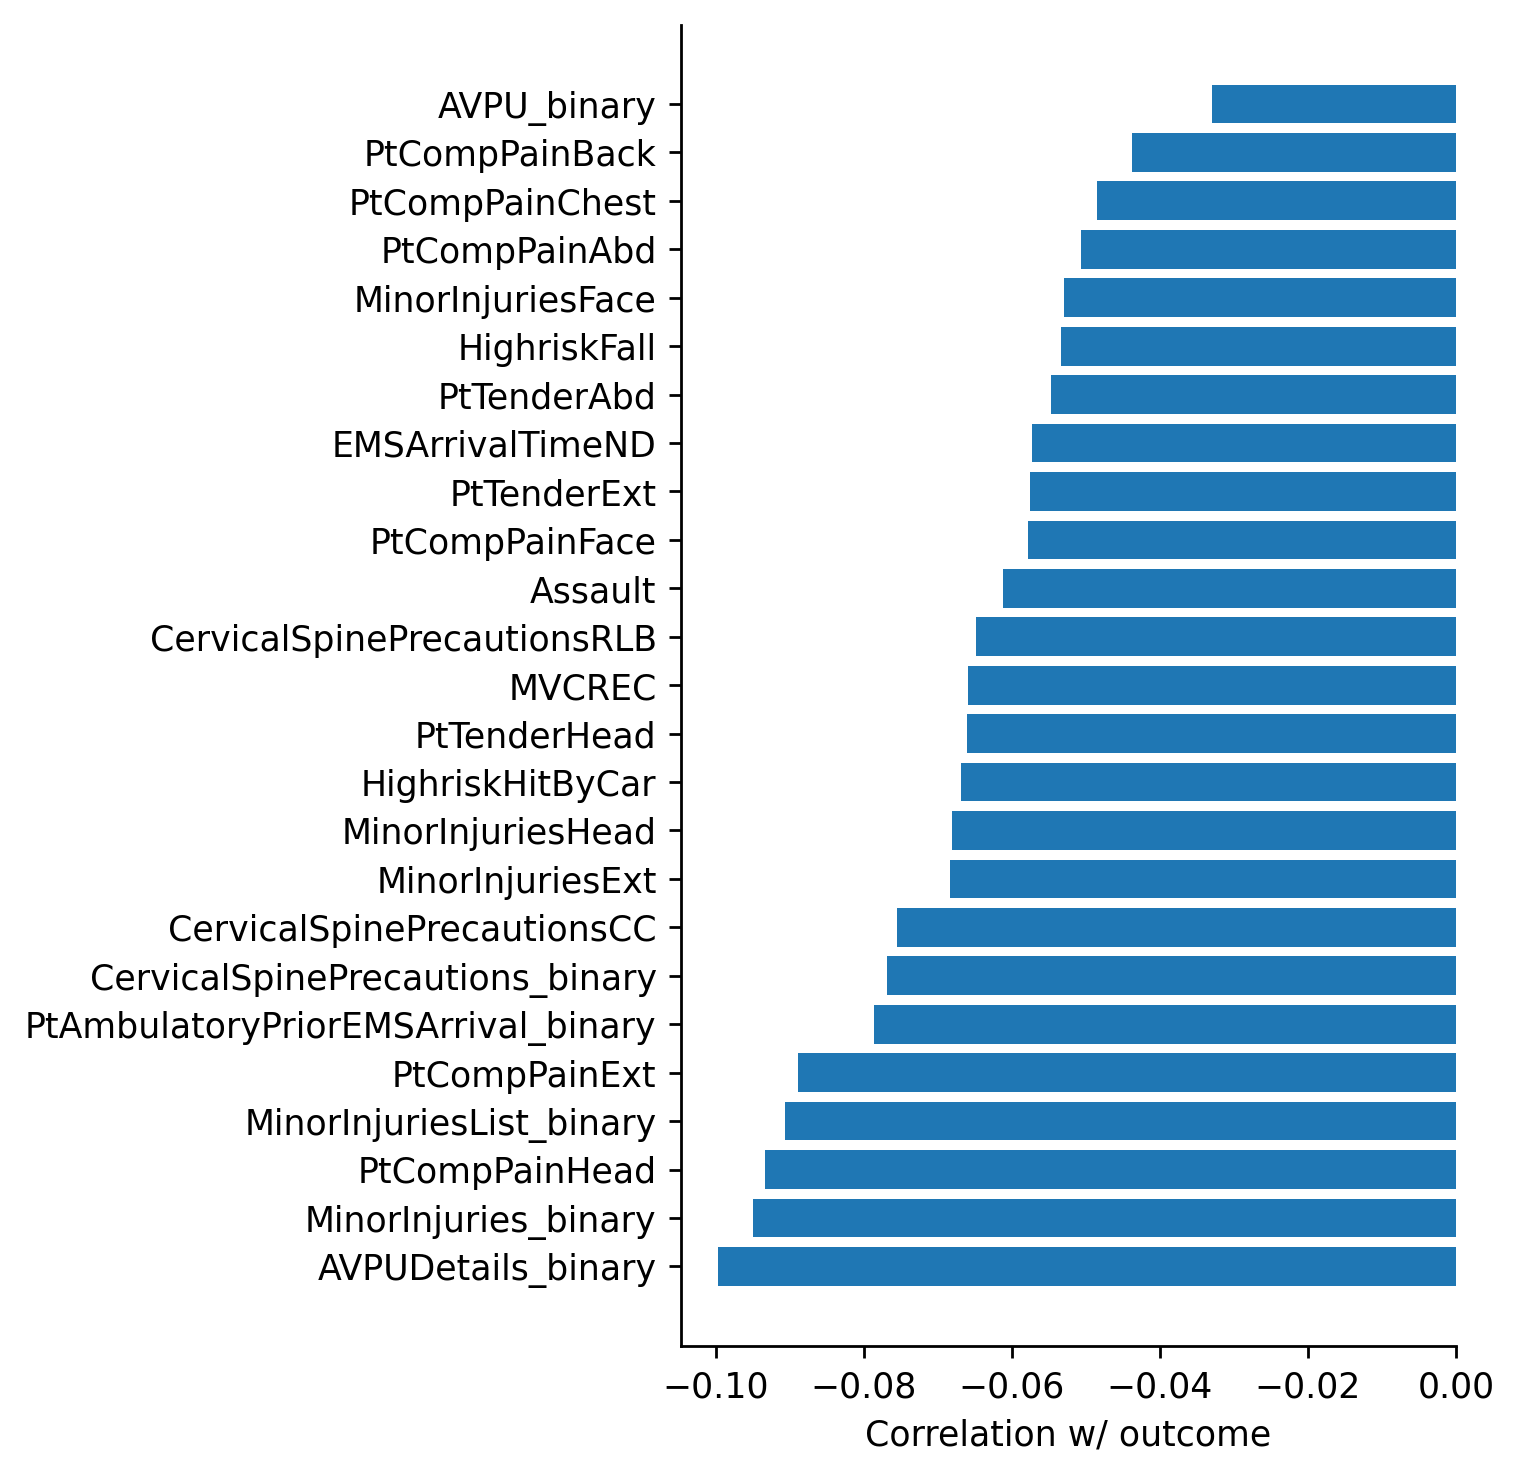

In [14]:
plt.figure(dpi=250, figsize=(4, 7))
vals = binary_corrs[outcome_def]
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[:25], vals[args][:25])
plt.xlabel('Correlation w/ outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

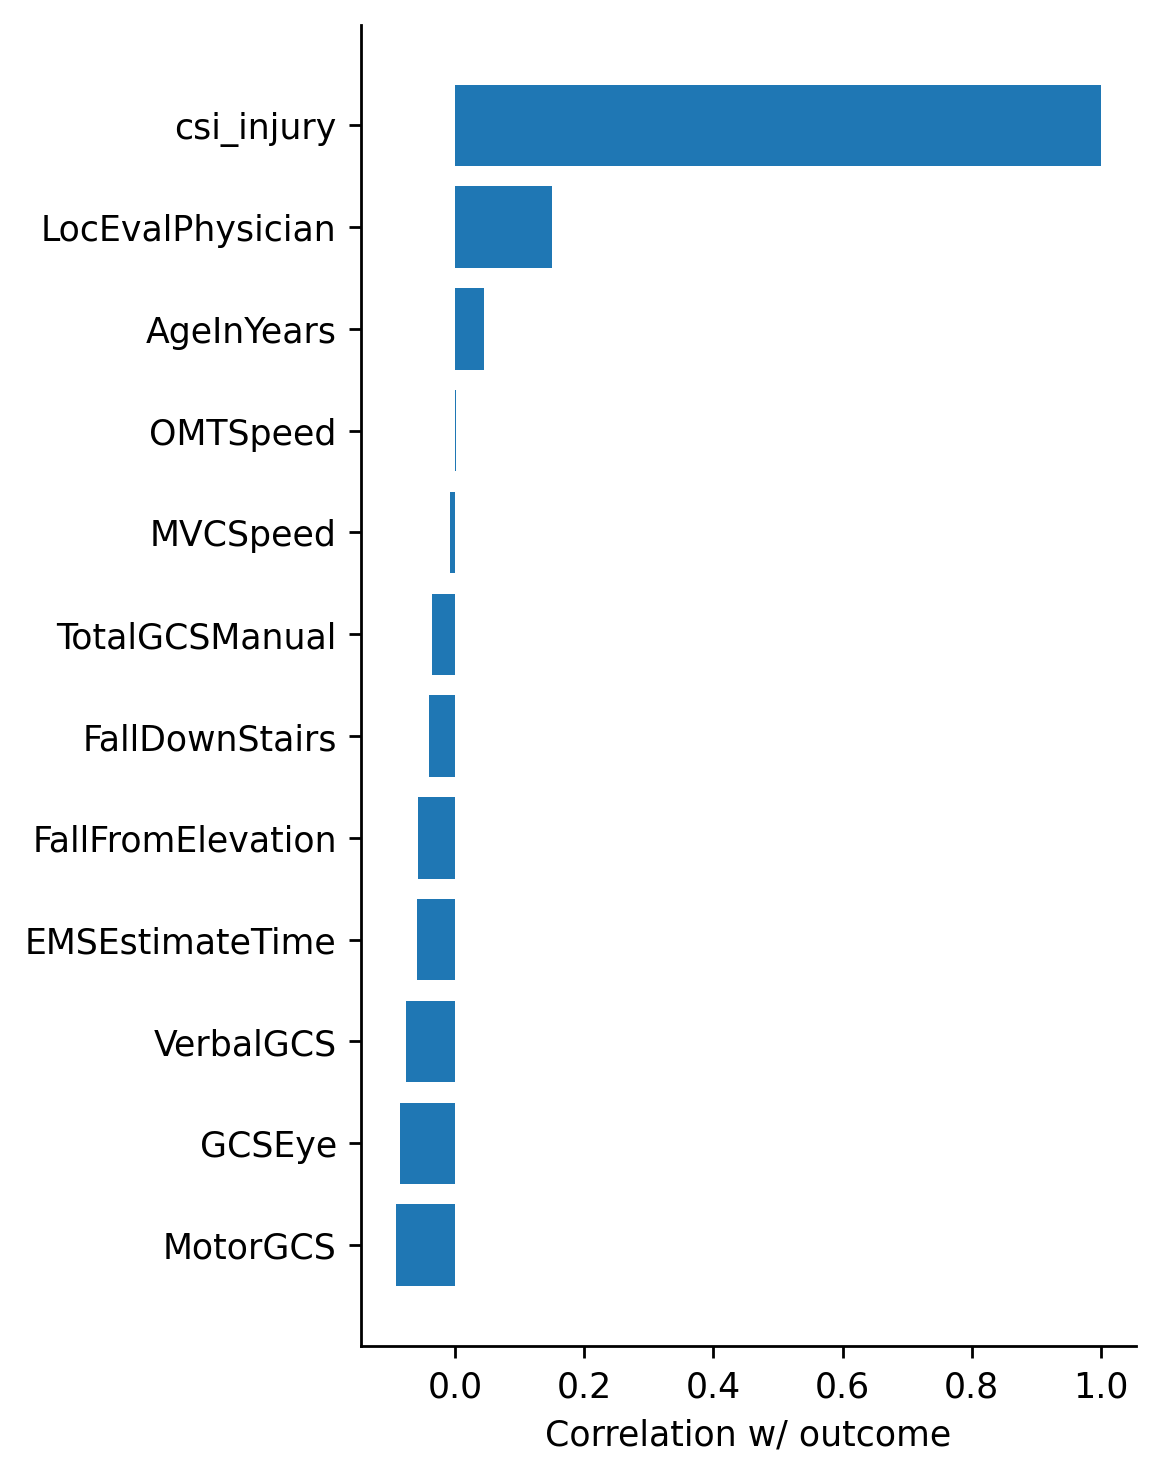

In [15]:
plt.figure(dpi=250, figsize=(4, 7))
vals = cont_corrs[outcome_def]
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs, vals[args])
plt.xlabel('Correlation w/ outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

# EDA of Missingness

In [16]:
# get percent missing by column
print("25 Covariates with Highest Percent Missingness\n")
print("All Covariates:")
missing_frac = (eda_df.isna().sum() / eda_df.shape[0]) * 100
print(missing_frac.sort_values(ascending=False)[:25])

print("\nContinuous Covariates:")
bin_missing_frac = (binary_eda_data.isna().sum() / binary_eda_data.shape[0]) * 100
print(bin_missing_frac.sort_values(ascending=False)[:25])

25 Covariates with Highest Percent Missingness

All Covariates:
AgeInYears                0.0
PtTenderNeckMid           0.0
PtTenderNeckLevelC1       0.0
PtTenderNeckLevelC2       0.0
PtTenderNeckLevelC3       0.0
PtTenderNeckLevelC4       0.0
PtTenderNeckLevelC5       0.0
PtTenderNeckLevelC6       0.0
PtTenderNeckLevelC7       0.0
PtTenderNeckLevelOther    0.0
PtTenderNeckOther         0.0
SubInj_Ext2               0.0
PtTenderNeckPos           0.0
PtTenderOther             0.0
PtTenderPelvis            0.0
ShakenBabySyndrome        0.0
TenderNeck2               0.0
Torticollis2              0.0
TotalGCSManual            0.0
VerbalGCS                 0.0
PtTenderNeckLevel         0.0
PtTenderNeckLat           0.0
PtTenderNeckAnt           0.0
PtTenderNeck              0.0
Predisposed               0.0
dtype: float64

Continuous Covariates:
AlteredMentalStatus2      0.0
PtTenderNeckPos           0.0
PtTenderNeckLevelC4       0.0
PtTenderNeckLevelC5       0.0
PtTenderNeckLevelC6       0

In [17]:
complete_binary_covar = binary_columns[bin_missing_frac==0]
print("Binary covar. with no missing data:",len(complete_binary_covar))

missing_columns = binary_columns[bin_missing_frac!=0]
print("Binary covar. with some missing data:",len(missing_columns))

Binary covar. with no missing data: 159
Binary covar. with some missing data: 0


In [18]:
binary_missing_bools = binary_eda_data[missing_columns].isna()
binary_missing_corrs = binary_missing_bools.corr(method='spearman')

/accounts/grad/wtorous/.local/lib/python3.8/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


ValueError: The number of observations cannot be determined on an empty distance matrix.

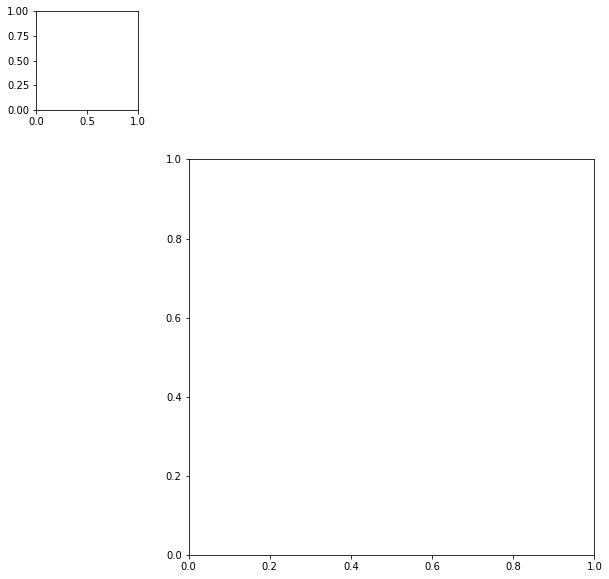

In [19]:
corrmap = sns.clustermap(binary_missing_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)

# EDA of Demographic Data

In [ ]:
eda_demographic_df = pd.read_csv("data/csi_pecarn/raw/demographics.csv").set_index(["studysubjectid"])
print(eda_demographic_df.columns)

In [ ]:
gender_df = eda_demographic_df.groupby('site')['Gender'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Gender Variable Across Study Sites')
gender_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
race_df = eda_demographic_df.groupby('site')['Race'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Race Variable Across Study Sites')
race_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
ethnicity_df = eda_demographic_df.groupby('site')['Ethnicity'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Ethnicity Variable Across Study Sites')
ethnicity_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
payor_df = eda_demographic_df.groupby('site')['PayorType'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Payor Type Across Study Sites')
payor_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
age_df = eda_demographic_df[['site','AgeInYears']]


bins = [0, 2, 5, 10, 13, np.inf]
names = ['<2', '2-5', '5-10', '10-13', '13+']

age_df.loc[:,['AgeBin']] = pd.cut(age_df.loc[:,'AgeInYears'], bins, labels=names)

age_range_df = age_df.groupby('site')['AgeBin'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Age Range Across Study Sites')
age_range_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()
